In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale=1.2)
import numpy as np
import seaborn as sns
from pylab import rcParams
import pandas_profiling as pp

In [2]:
df = pd.read_csv("code/for_nermin_reshaped.csv", na_values= ' ')

C:\Users\nogur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,13,14,29,38,45,47,76,82,94,104,121,152,170,197,239,282,307,321,371,394,406,444,504,506,508,512,537,557,574,614,649,672,722,733,778,780,782,786,811,831,848,888,923,946,996,1007,1052,1054,1056,1059,1101,1399,1632,1652,1663,1708,1750,1793,1818,1832,1905,1917,2015,2017,2019,2068,2160,2183,2233,2289,2291,2293,2342,2434,2457,2507,2563,2565,2567,2615,3067,3143,3163,3174,3219,3261,3304,3329,3343,3416,3428,3466,3480,3526,3528,3530,3579,3671,3694,3744,3755,3800,3802,3804,3853,3945,3968,4018,4029,4074,4076,4078,4126,4577,4578,4654,4674,4685,4730,4772,4815,4840,4854,4927,4939,5037,5039,5041,5050,5059,5090,5182,5205,5255,5311,5313,5315,5333,5364,5456,5479,5529,5585,5587,5637,6165,6185,6196,6241,6283,6326,6351,6365,6438,6450,6488,6502,6548,6550,6552,6601,6693,6716,6766,6777,6822,6824,6826,6875,6967,6990,7040,7051,7096,7098,7100,7148,7599,7600,7676,7696,7707,7752,7794,7837,7862,7876,7949,796

In [3]:
df_cols = pd.read_excel("questionnaire.xlsx")

In [4]:
duplicte_by = [
'intake',
'control_6month',
'pre_treatment_arm_1',
'5th_session_arm_1',
'post_treatment_arm_1',
'followup_3month_arm_1',
'control_3month_arm_1',
'control_5weeks_arm_1',
'corona_arm_1',
'er_arm_1',
'followup_12month_arm_1',
'er_one_week_arm_1',
'control_12month_arm_1'
]

In [5]:
c_ssrs = [i for  i in list(df_cols.name) if 'c_ssrs' in i]

In [6]:
c_ssrs_columns = []
for event in duplicte_by:
    c_ssrs_columns.extend([f'{question}_{event}' for question in c_ssrs])
    tmp = df_cols[df_cols.name.isin(c_ssrs)]
    tmp['name'] = tmp.name + f'_{event}'
    df_cols = pd.concat([df_cols, tmp])
df_cols = df_cols[~df_cols.name.isin(c_ssrs)]

C:\Users\nogur\AppData\Local\Temp/ipykernel_14976/833608476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['name'] = tmp.name + f'_{event}'


In [7]:
opening =  [i for  i in list(df_cols.name) if 'c_ssrs' not in i]

In [8]:
df = df[c_ssrs_columns+opening]


In [9]:
for i in df_cols[df_cols.type == 'date'].name:
    tmp = pd.to_datetime(df[~df[i].isna()][i])
    
    print(i, tmp.dtype)
    print('min =', tmp.min(), 'max =', tmp.max())


complaint_date datetime64[ns]
min = 2018-03-16 00:00:00 max = 2023-02-23 00:00:00


In [10]:
for i in df_cols[df_cols.type == 'int'].name:
    tmp = df[~df[i].isna()][i]
    print(i, tmp.dtype)
    print('min =', tmp.min(), 'max =', tmp.max(), '\n')


c_ssrs_7_intake_intake float64
min = -11.0 max = 123.0 

c_ssrs_8_intake_intake float64
min = 0.0 max = 38288289.0 

c_ssrs_7_intake_control_6month float64
min = nan max = nan 

c_ssrs_8_intake_control_6month float64
min = nan max = nan 

c_ssrs_7_intake_pre_treatment_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_pre_treatment_arm_1 float64
min = nan max = nan 

c_ssrs_7_intake_5th_session_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_5th_session_arm_1 float64
min = nan max = nan 

c_ssrs_7_intake_post_treatment_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_post_treatment_arm_1 float64
min = nan max = nan 

c_ssrs_7_intake_followup_3month_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_followup_3month_arm_1 float64
min = nan max = nan 

c_ssrs_7_intake_control_3month_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_control_3month_arm_1 float64
min = nan max = nan 

c_ssrs_7_intake_control_5weeks_arm_1 float64
min = nan max = nan 

c_ssrs_8_intake_control_5weeks

In [11]:
df_cols.type.unique()

array(['binary', 'date', 'int'], dtype=object)

In [12]:
for i in df_cols[df_cols.type == 'binary'].name:
    print(df[~df[i].isna()][i].isin([0,1]).all())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [13]:

df = df.dropna(how='all', axis=0)
df = df.dropna(how='all', axis=1)

In [14]:
df.shape

(298, 36)

## looking for outliers

In [14]:
profile = pp.ProfileReport(df[opening])
profile.to_file(f'opening_questions_report.html')

            

C:\Users\nogur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
len([i for  i in c_ssrs_columns if ('intake' in i) and (i in df.columns)])

15

In [30]:
for event in duplicte_by:
    cols = [i for  i in c_ssrs_columns if (event in i) and (i in df.columns)][:14]
    print(event, '\n', cols)
    if cols:
        profile = pp.ProfileReport(df[cols])
        profile.to_file(f'{event}_questions_report.html')



intake 
 ['c_ssrs_1_life_intake', 'c_ssrs_2_life_intake', 'c_ssrs_3_life_intake', 'c_ssrs_4_life_intake', 'c_ssrs_5_life_intake', 'c_ssrs_6_life_intake', 'c_ssrs_1_2weeks_intake', 'c_ssrs_2_2weeks_intake', 'c_ssrs_3_2weeks_intake', 'c_ssrs_4_2weeks_intake', 'c_ssrs_5_2weeks_intake', 'c_ssrs_6_2weeks_intake', 'c_ssrs_6_3month_intake', 'c_ssrs_7_intake_intake']


C:\Users\nogur\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

control_6month 
 []
pre_treatment_arm_1 
 []
5th_session_arm_1 
 []
post_treatment_arm_1 
 []
followup_3month_arm_1 
 []
control_3month_arm_1 
 []
control_5weeks_arm_1 
 []
corona_arm_1 
 []
er_arm_1 
 []
followup_12month_arm_1 
 []
er_one_week_arm_1 
 []
control_12month_arm_1 
 []


In [16]:
profile = pp.ProfileReport(df)
profile.to_file(f'all_questions_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

False


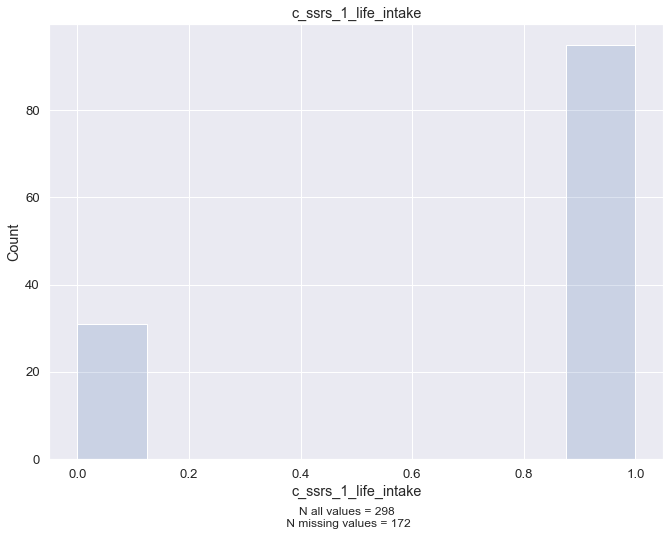

False


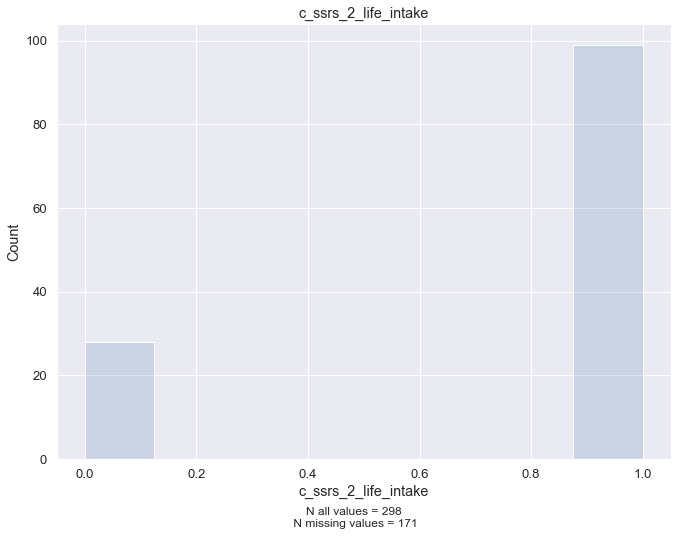

False


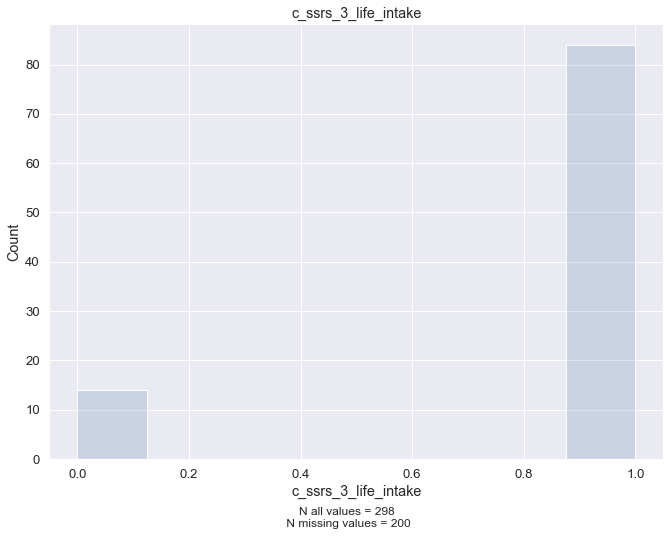

False


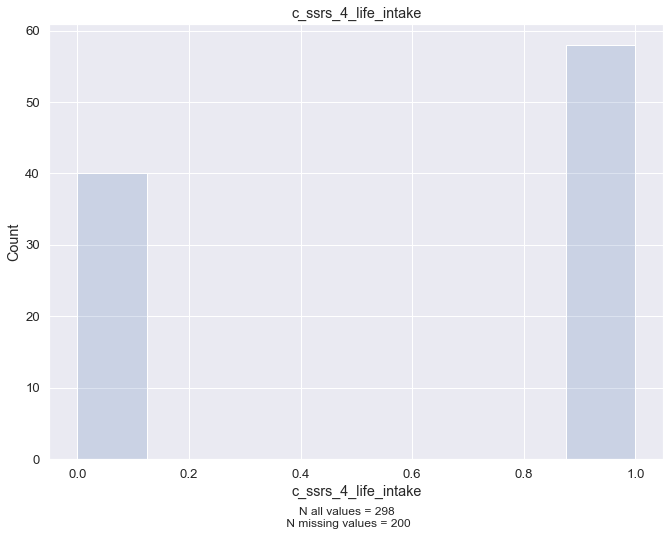

False


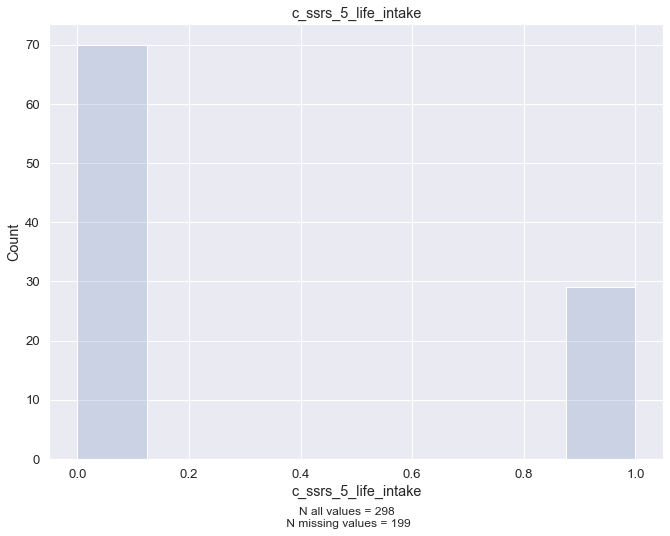

False


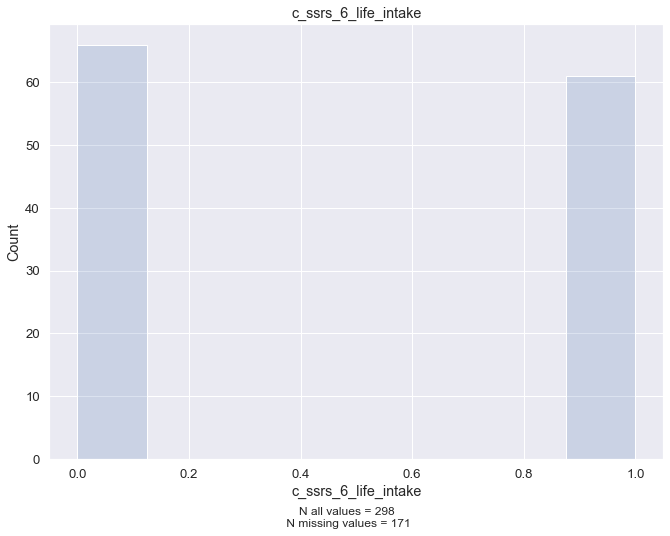

False


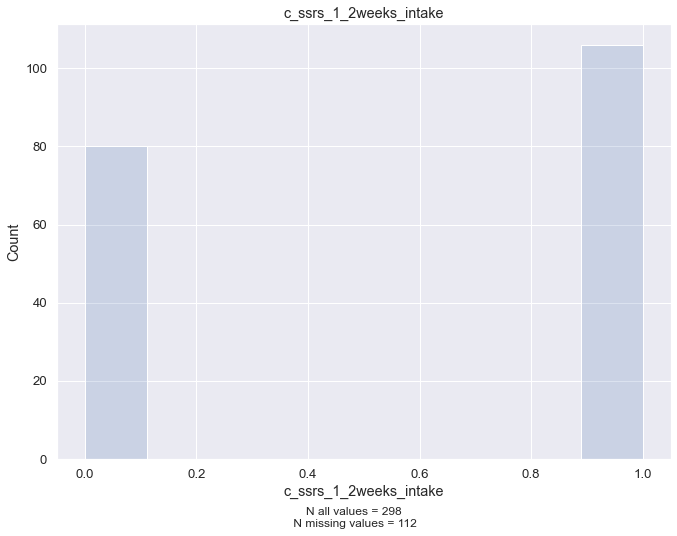

False


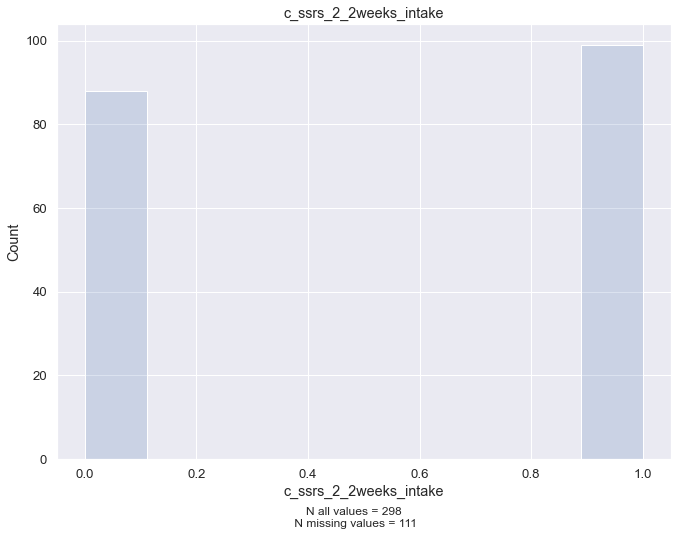

False


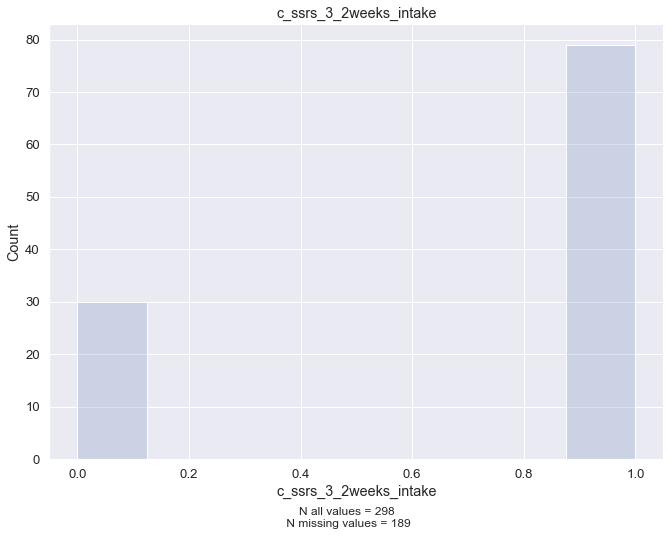

False


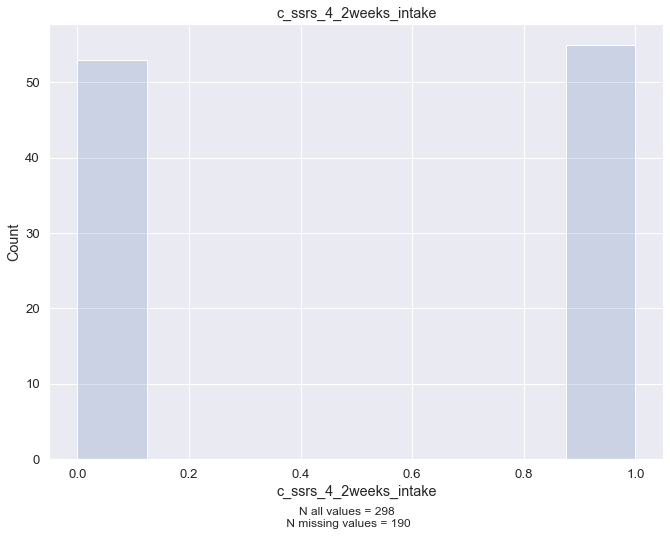

False


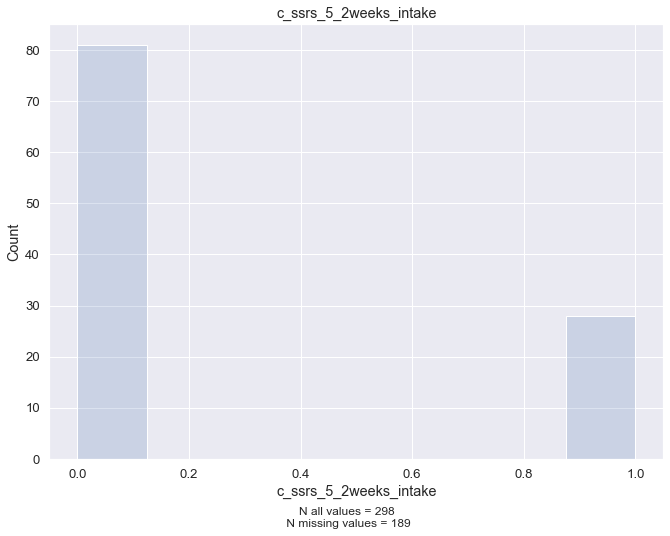

False


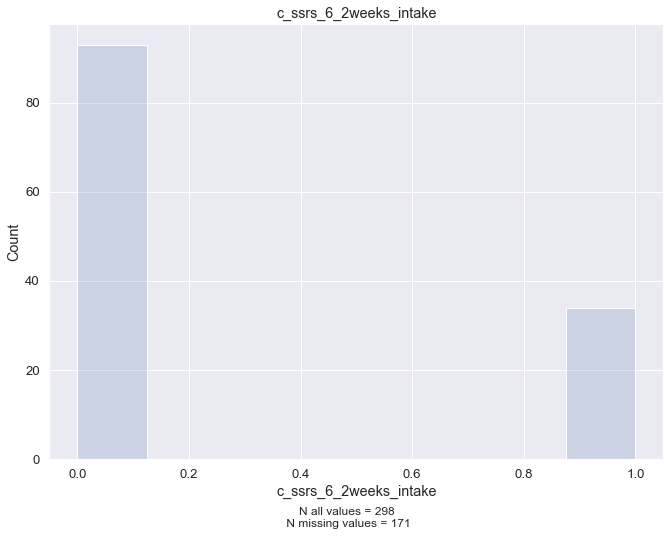

False


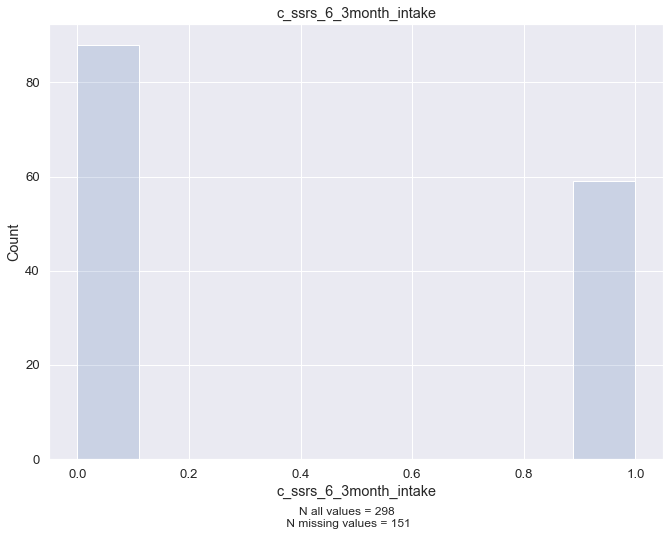

False


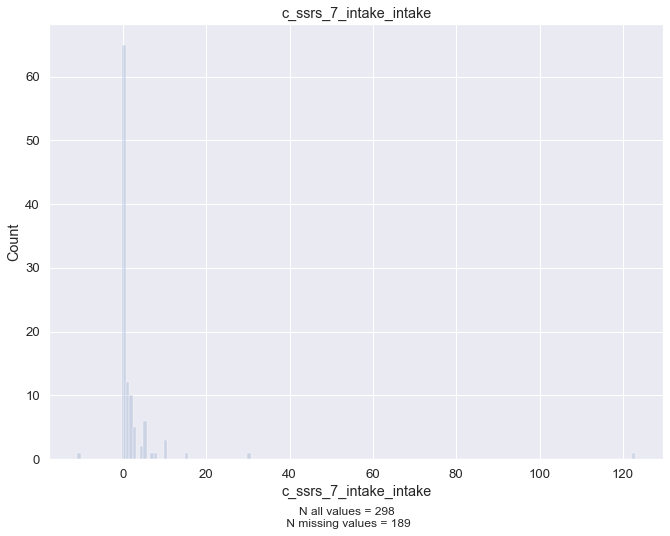

False


In [ ]:
for i in c_ssrs_columns+opening:
    if i in df.columns:
        print(df[i].isna().all())
        sns.histplot(df[i], alpha=0.2)
        plt.title(i)
        shape = df[i].shape
        plt.figtext(0.5, 0.01, f"N all values = {shape[0]}\n N missing values = {df[i].isna().sum()}", wrap=True, horizontalalignment='center', fontsize=12)
        plt.savefig(f'plot_{i}.png')
        plt.show()

In [ ]:
corr = df.corr(method='kendall')

In [ ]:
for i in corr.columns:
    for j in corr.index:
        if (corr[i][j] > 0.6) and (not i == j):
            print(i, j, corr[i][j], '\n')

<AxesSubplot:>

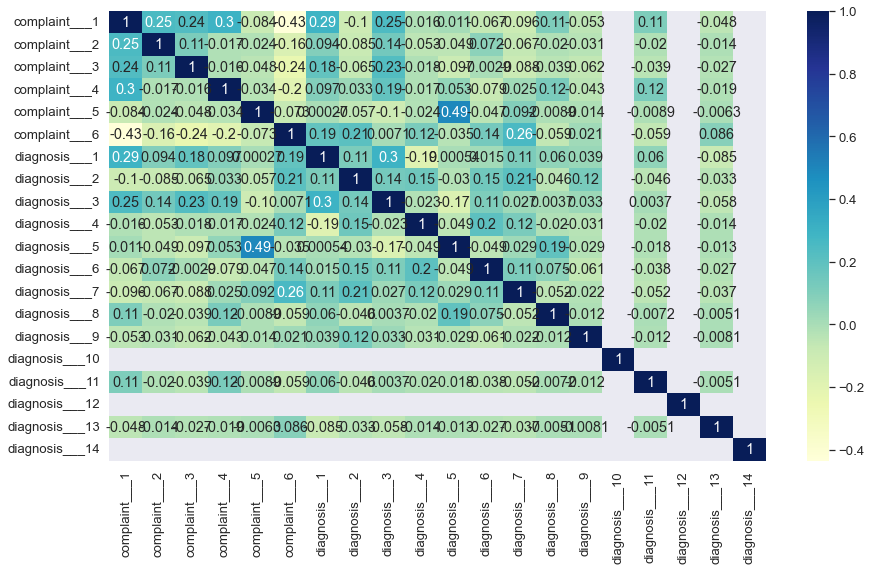

In [94]:
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [83]:
1+1

2